<a href="https://colab.research.google.com/github/AlflenGabriel/Regressao-Linear-valor-residencial/blob/main/RegressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressao linear**

importar o CSV com os dados dos imóveis

In [ ]:
import pandas as pd
dataFrame = pd.read_csv('/content/drive/MyDrive/Ciência de Dados/kc_house_data.csv' )
print("Linhas: %d, Colunas: %d" % (len(dataFrame), len(dataFrame.columns)))

Linhas: 21613, Colunas: 21


In [ ]:
dataFrame.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
dataFrame.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
dataFrame.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

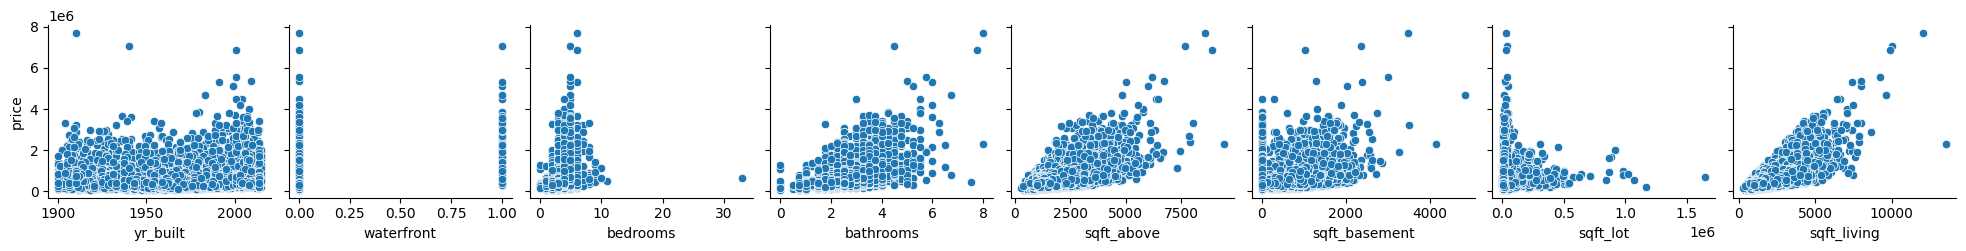

In [ ]:
import seaborn as sns
sns.pairplot(dataFrame,
            x_vars=["yr_built", "waterfront", "bedrooms", "bathrooms", "sqft_above", "sqft_basement", "sqft_lot", "sqft_living"],
            y_vars=["price"])

Regreção linear simples

In [ ]:
X= dataFrame[["sqft_living"]]  #variavel independente
y= dataFrame[["price"]]  #variavel dependente

separar base de teste para evitar overfitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)
print("Qtd. treinamento: %d. Qtd. teste: %d" % (len(X_train), len(X_test)))

Qtd. treinamento: 19451. Qtd. teste: 2162


criar o obj. que vai criar a regressão linear

In [ ]:
from sklearn.linear_model import LinearRegression
objRL = LinearRegression()
objRL

LinearRegression()

In [ ]:
objRL.fit(X_train,y_train)

LinearRegression()

avaliar preço de uma casa

In [ ]:
data = [
        [1181],
        [2575],
        [775],
        [450]
]

y_pred=objRL.predict(X_test)

objRL.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[285969.411836  ],
       [681051.20353167],
       [170902.54854444],
       [ 78792.3747273 ]])

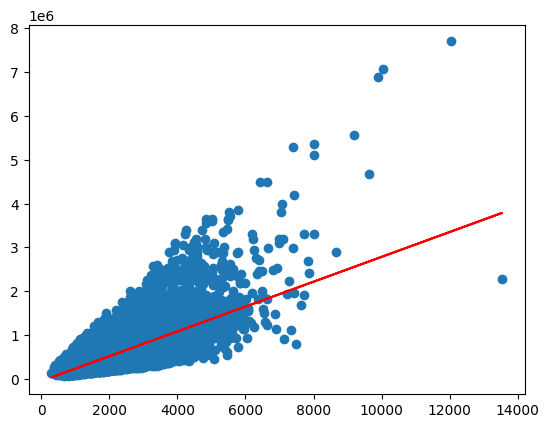

In [ ]:
y_pred = objRL.predict(X_train)

import matplotlib.pyplot as plt
plt.scatter(X_train, y_train) #plota o grafico
plt.plot(X_train, y_pred, color="red") #plota a linha

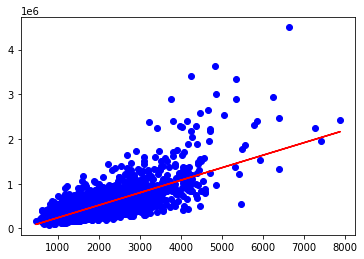

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test, color="blue")
plt.plot(X_test,y_pred, color="red")
plt.show()

**PROVA** - dois indicadores muito utilizados na geração de regressao linear para medir a acuracia do grafico gerado. **R2** e **MSE score**.
**R2**, quanto mais prox. de 1, melhor está o gráfico.
**MSE**, quanto mais prox. de 0, melhor está o gráfico.

In [ ]:
y_pred_test = objRL.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
print("R2: ",r2_score(y_test, y_pred_test)) # R2 maior q 0.7 é bom.
print("MSE: ",mean_squared_error(y_test, y_pred_test)) # mais prox de 0 melhor.

R2:  0.46426503594371127
MSE:  59571293392.89544


regressao linear como 3  variaveis independentes

In [ ]:
X2= dataFrame[["sqft_living", "bedrooms", "bathrooms"]]  #variavel independente

from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y, test_size=0.1)
print("Qtd. treinamento: %d. Qtd. teste: %d" % (len(X_train2), len(X_test2)))

Qtd. treinamento: 19451. Qtd. teste: 2162


In [ ]:
from sklearn.linear_model import LinearRegression
objRL2 = LinearRegression()
objRL2.fit(X_train2,y_train2)

LinearRegression()

In [ ]:
y_pred2=objRL2.predict(X_test2)

from sklearn.metrics import r2_score, mean_squared_error
print("R2: ", r2_score(y_test2, y_pred2)) # R2 maior q 0.7 é bom.
print("MSE: ", mean_squared_error(y_test2, y_pred2)) # mais prox de 0 melhor.

R2:  0.5247257349694605
MSE:  71803504445.93369


In [ ]:
X3 = dataFrame[["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "grade",
                "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"]]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y,test_size=0.2)
objRL3 = LinearRegression()
objRL3.fit(X3_train, y3_train)

y_pred3=objRL3.predict(X3_test)
print(f"R2: {r2_score(y3_test, y_pred3)}") # R2 maior q 0.7 é bom.
print(f"MSE: {mean_squared_error(y3_test, y_pred3)}") # mais prox de 0 melhor.

R2: 0.7026613231173895
MSE: 39288658239.95598


In [ ]:
X4 = dataFrame[["sqft_living", "sqft_above", "bedrooms", "bathrooms"]]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y,test_size=0.2)
objRL4 = LinearRegression()
objRL4.fit(X4_train, y4_train)

y_pred4=objRL4.predict(X4_test)
print(f"R2: {r2_score(y4_test, y_pred4)}") # R2 maior q 0.7 é bom.
print(f"MSE: {mean_squared_error(y4_test, y_pred4)}") # mais prox de 0 melhor.

R2: 0.4911393282936336
MSE: 64525572368.58282


dropando table id, date e preço e usando todas as outras = melhor opção<-

In [ ]:
X5 = dataFrame.drop(columns=["id", "date", "price"]) #dropando as colunas para usar as restantes da tabela

X5_train, X5_test, y5_train, y5_test = train_test_split(X5,y,test_size=0.1, random_state = 30)

objRL5 = LinearRegression()
objRL5.fit(X5_train, y5_train)

y5_pred = objRL5.predict(X5_test)
print(f"R2: {r2_score(y5_test, y5_pred)}") # R2 maior q 0.7 é bom.
print(f"MSE: {mean_squared_error(y5_test, y5_pred)}") # mais prox de 0 melhor.

R2: 0.708968730307757
MSE: 33663655609.673855


<Axes: >

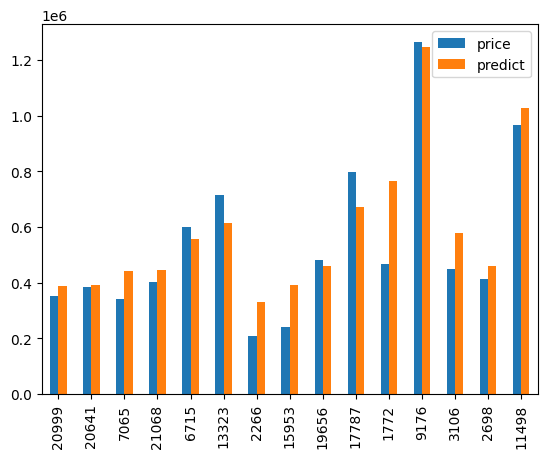

In [ ]:
y5_test.head()
y5_test["predict"] = y5_pred
y5_test.head()
dataFrameTest = y5_test.head(15)
dataFrameTest.plot(kind="bar")